# Linear Regression

In this notebook, we practice a linear regresion using Mean-Square-Error. The problem itself is rather simple: solve data points for a linear equation $y=ax+b$. We will try both analytical solution and gradient descent method.

## Goals:
* Practice a simple linear regression using an analytical solution
* Implement a gradient descent method

First, we download a python package for the workshop and make sure it's up-to-date.

In [1]:
![ -d kmi ] || git clone https://github.com/drinkingkazu/kmi
! cd kmi && git pull

Already up to date.


... followed by importing some libraries

In [2]:
import matplotlib   # for plotting in 2D
%matplotlib inline  
import torch, numpy # only to set random seed (used by underlying python packages)
import numpy as np  # only to set random seed (used by underlying python packages)
# Set random seed
SEED=123
_=numpy.random.seed(SEED)
_=torch.manual_seed(SEED)
# Add the path for the python package downloaded
import sys
sys.path.insert(0, 'kmi')

For this practice, we will generate a data using a fake data generator `linear_regression_sample` which takes the slope and offset (i.e. $a$ and $b$ of an equation $y=ax+b$) as well as the number of data points to be genereated.

In [3]:
import kmi.iotools.fake_data as fake_data

a,b=1.5,0.5
x,y=fake_data.linear_regression(a,b,num_sample=1000)

Let's visualize using `matplotlib`

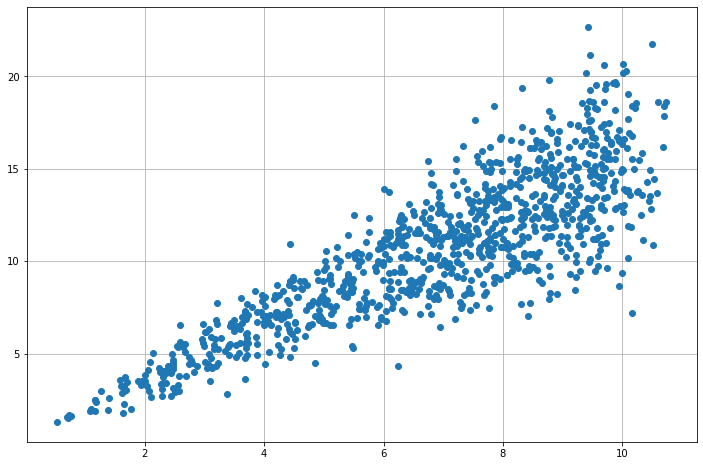

In [4]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(12,8),facecolor='w')
plt.plot(x,y,linestyle='',marker='o',markersize=6)
plt.grid()
plt.show()

## Analytical solution

Our goal is to find a linear equation that correlates $x$ and $y$ data values, and we attempt this by minimizing the MSE. In other words, our objective is to find $w_0$ and $w_1$ such that:
$$
\text{Min. } \displaystyle{\left(\sum_i (y_i - \hat{y}_i)^2\right)} \; \text{  where  } \; \hat{y}_i = w_0\cdot x_i + w_1
$$

The analytical solution for the linear prior is:

$$
w_0 = \displaystyle{\frac{\sum(x_i-\langle x\rangle)(y_i-\langle y\rangle)}{\sum(x_i-\langle x\rangle)^2}} \;\text{ and } \; w_1 = \langle y\rangle - w_0\cdot\langle x\rangle
$$

Let's implement and see how it works

In [ ]:
w0 = YOUR_CODE
w1 = YOUR_CODE

print('Analytical solution for a',w0,'and b',w1)

## Gradient Descent

Another approach to the solution is to use a _Gradient Descent_ technique as we covered in the lecture. In this case, we compute the error (i.e. MSE) and update the weights according to the equation:
$$
w_{\text{new}} = w - \lambda \Delta_wL
$$
where, in this case,
$$
L = \frac{1}{N}\sum_i (y_i - \hat{y}_i)^2 = \frac{1}{N}\sum_i(y_i - w_0\cdot x_i - w_1)^2
$$
Accordingly, the gradients are:
$$
\frac{\partial L}{\partial w_0} = - \frac{2}{N}\sum_i(y_i - w_0\cdot x_i)\cdot x
$$
and
$$
\frac{\partial L}{\partial w_1} = - \frac{2}{N}\sum_i(y_i - w_0\cdot x_i - w_1)
$$

In [9]:
def gradient(x, y, w0, w1):
    '''
    Compute the gradients grad_w0 and grad_w1
    '''
    error = y - (x*w0+w1)
    grad_w0 = -2/len(y) * np.sum(x * error)
    grad_w1 = -2/len(y) * np.sum(error)
    
    #grad_w0 = YOUR_CODE
    #grad_w1 = YOUR_CODE
    return grad_w0, grad_w1
    
    
def optimize_gradient_descent(x, y, w0, w1, iterations=50, lr=0.001):
    """
    Run gradient descent for specified iterations
    """
    loss, w0s, w1s = [], [], []
    for i in range(iterations):
        # Compute the loss per step
        loss.append(np.mean(np.power(y - (x * w0 + w1),2)))
        
        # Record corresponding parameter values
        w0s.append(w0)
        w1s.append(w1)
        
        # Compute gradient for w
        grad_w0, grad_w1 = gradient(x,y,w0,w1)
        
        # Update
        w0 = w0 - lr * grad_w0
        w1 = w1 - lr * grad_w1
        
    return loss, w0s, w1s

Ready? Let's run and see if it works! 

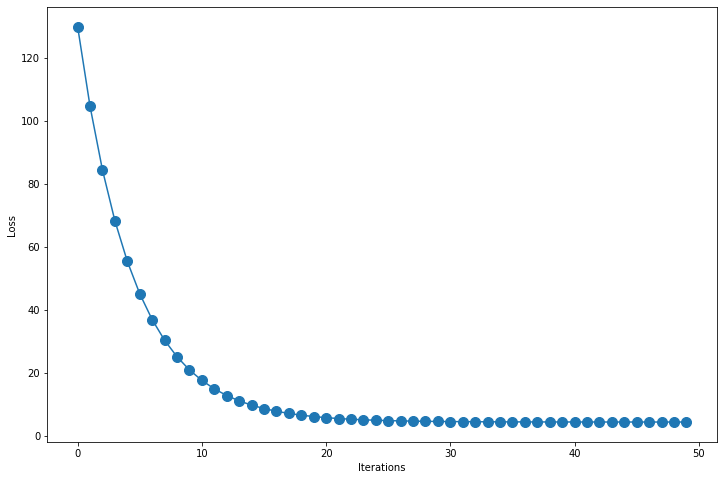

In [10]:
# Initial values for the parameters
w0,w1=0.,0.

# Optimize!
loss,w0s,w1s = optimize_gradient_descent(x,y,w0,w1)

# Plot
fig,ax = plt.subplots(figsize=(12,8),facecolor='w')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(loss,marker='o',markersize=10)
plt.show()

For fun, let's visualize the history of parameter value updates


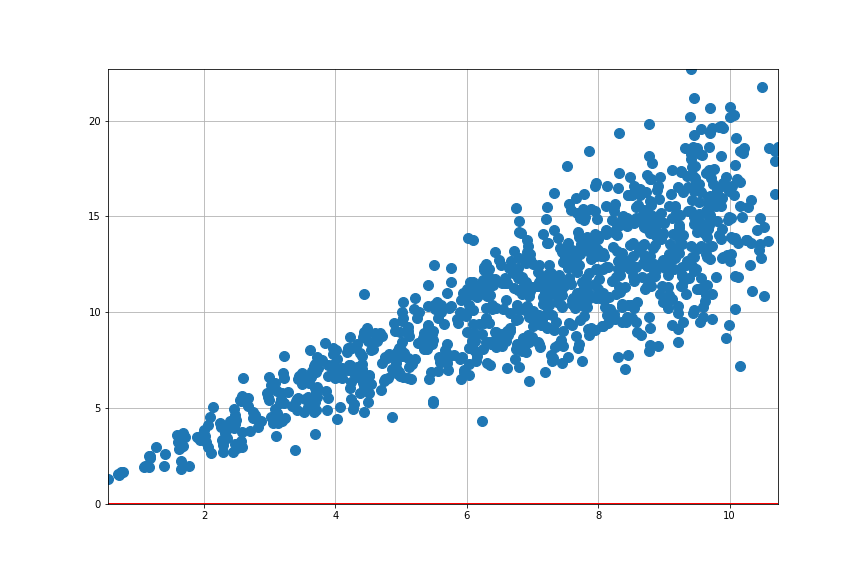

In [11]:
import imageio
import io
import base64
from IPython.display import HTML

def make_plot(x,y,w0,w1):
    
        fig,ax = plt.subplots(figsize=(12,8),facecolor='w')
        ax.plot(x,y,markersize=10,marker='o',linestyle='')
        xmin=np.min(x)
        xmax=np.max(x)
        ymin = w0*xmin+w1
        ymax = w0*xmax+w1
        ax.plot((xmin,xmax),(ymin,ymax),linewidth=2,color='red')
        ax.set_xlim((xmin,xmax))
        ax.set_ylim((0,np.max(y)))
        ax.grid()

        fig.canvas.draw()       # draw the canvas, cache the renderer
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        plt.close()
        return image

kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('./anime.gif', [make_plot(x,y,w0s[i],w1s[i]) for i in range(len(w0s))], fps=10)

video = io.open('anime.gif', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))
